In [68]:
from skimage import feature
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from imutils import paths
import os
from sklearn.svm import LinearSVC

In [7]:
numPoints = 24
radius = 8

In [37]:
image = cv.imread('images/leaf.jpg')
gray_im = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

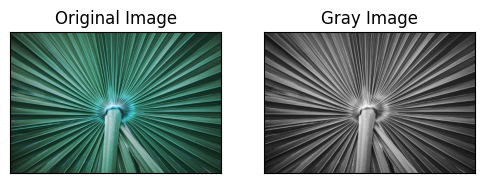

In [38]:
plt.figure(figsize=(6,6))
plt.subplot(221), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(gray_im, cmap='gray')
plt.title('Gray Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [39]:
lbp = feature.local_binary_pattern(gray_im, numPoints, radius, method="uniform")

In [93]:
(hist, _) = np.histogram(lbp.ravel(),
    bins = np.arange(0, numPoints + 3),
    range = (0, numPoints + 2))

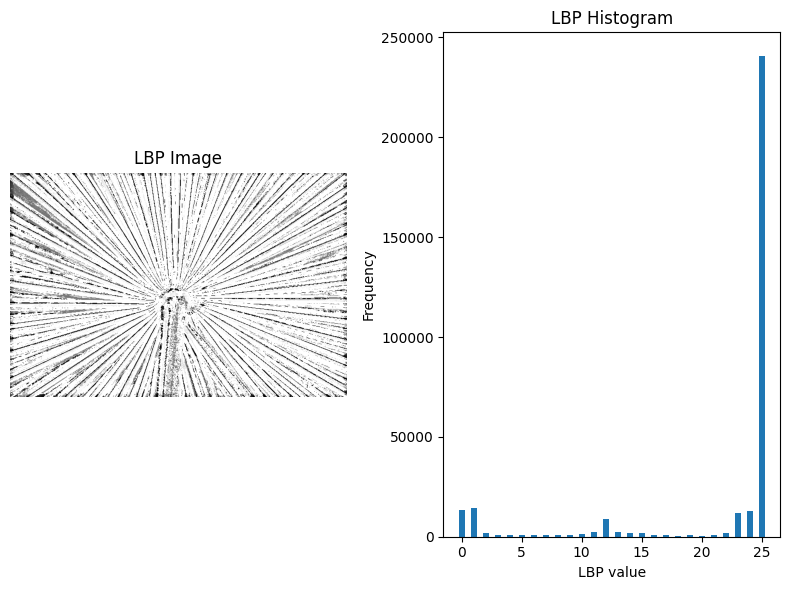

In [94]:
# Plot the LBP image
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(lbp, cmap='gray')
plt.title('LBP Image')
plt.axis('off')

# Plot the LBP histogram
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(hist)), hist, width=0.5)
plt.title('LBP Histogram')
plt.xlabel('LBP value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [95]:
def describe(image, eps=1e-7):
	# compute the Local Binary Pattern representation
	# of the image, and then use the LBP representation
	# to build the histogram of patterns
	lbp = feature.local_binary_pattern(image, numPoints, radius, method="uniform")
	(hist, _) = np.histogram(lbp.ravel(),
		bins=np.arange(0, numPoints + 3),
		range=(0, numPoints + 2))

	# normalize the histogram
	hist = hist.astype("float")
	hist /= (hist.sum() + eps)

	# return the histogram of Local Binary Patterns
	return hist

In [61]:
data = []
labels = []

In [96]:
# loop over the training images
for imagePath in paths.list_images("images\\texture_analysis\\training"):

	# load the image, convert it to grayscale, and describe it
	image = cv.imread(imagePath)
	gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
	hist = describe(gray)
	
	# extract the label from the image path, then update the
	# label and data lists
	labels.append(imagePath.split(os.path.sep)[-2])
	data.append(hist)

In [97]:
# train a Linear SVM on the data
model = LinearSVC(C=100.0, random_state=42)
model.fit(data, labels)

LinearSVC(C=100.0, random_state=42)

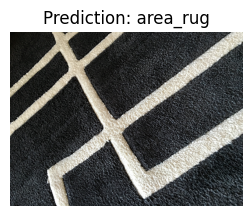

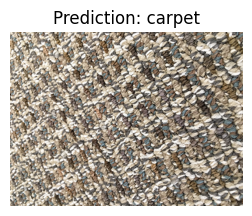

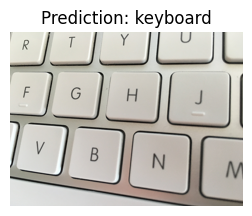

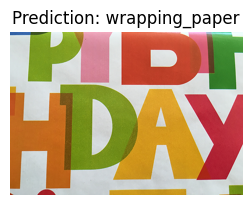

In [98]:
# loop over the testing images
for imagePath in paths.list_images(r"images\texture_analysis\testing"):
    
	# load the image, convert it to grayscale, describe it,
	# and classify it
    image = cv.imread(imagePath)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    hist = describe(gray)
    prediction = model.predict(hist.reshape(1, -1))

    # display the image and the prediction using matplotlib
    plt.figure(figsize=(3, 3))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(f"Prediction: {prediction[0]}")
    plt.axis("off")
    plt.show()